# Casey Masamitsu | Week 11 | MLNN

# Neural Networks image recognition - ConvNet

1. Add random noise (see below on `size parameter` on [`np.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html)) to the images in training and testing. **Make sure each image gets a different noise feature added to it. Inspect by printing out several images. Note - the `size` parameter should match the data. **
2. Compare the `accuracy` of train and val after N epochs for MLNN with and without noise. 
3. Vary the amount of noise by changing the `scale` parameter in `np.random.normal` by a factor. Use `.1, .5, 1.0, 2.0, 4.0` for the `scale` and keep track of the `accuracy` for training and validation and plot these results.
4. Compare these results with the previous week where we used a MultiLayer Perceptron (this week we use a ConvNet). 

# Neural Networks - Image Recognition 

In [1]:
import tensorflow as tf
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop
from keras import backend

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as  plt
%matplotlib inline

## Conv Net
Trains a simple convnet on the MNIST dataset.
Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).


In [5]:
# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if backend.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [6]:
# Noise 0 to 4.0

scales = [0, .1, .5, 1.0, 2.0, 4.0]
train_acc = []
test_acc = []

batch_size = 128
num_classes = 10
epochs = 12

# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)


for scale in scales:
    x_train_noise = x_train + np.random.normal(scale = scale, size=x_train.shape)
    x_test_noise = x_test + np.random.normal(scale = scale, size=x_test.shape)

    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=tf.keras.optimizers.Adadelta(learning_rate = 0.01),
                  metrics=['accuracy'])

    history = model.fit(x_train_noise, y_train,
                        batch_size = batch_size,
                        epochs = epochs,
                        verbose = 1,
                        validation_data = (x_test_noise, y_test))
    
    score = model.evaluate(x_test_noise, y_test, verbose=0)
    
    train_acc.append(history.history['accuracy'][-1])
    test_acc.append(score[1])

Epoch 1/12
  5/469 [..............................] - ETA: 6s - loss: 2.3069 - accuracy: 0.0953  

2022-04-18 10:49:21.188119: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - ETA: 0s - loss: 1.6304 - accuracy: 0.5076

2022-04-18 10:49:27.253988: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 7s 14ms/step - loss: 1.6304 - accuracy: 0.5076 - val_loss: 0.6424 - val_accuracy: 0.8570
Epoch 2/12
469/469 [==============================] - 6s 14ms/step - loss: 0.6442 - accuracy: 0.8061 - val_loss: 0.3796 - val_accuracy: 0.8956
Epoch 3/12
469/469 [==============================] - 7s 14ms/step - loss: 0.4800 - accuracy: 0.8580 - val_loss: 0.3168 - val_accuracy: 0.9101
Epoch 4/12
469/469 [==============================] - 6s 14ms/step - loss: 0.4143 - accuracy: 0.8771 - val_loss: 0.2860 - val_accuracy: 0.9157
Epoch 5/12
469/469 [==============================] - 6s 14ms/step - loss: 0.3709 - accuracy: 0.8901 - val_loss: 0.2606 - val_accuracy: 0.9230
Epoch 6/12
469/469 [==============================] - 7s 14ms/step - loss: 0.3409 - accuracy: 0.8998 - val_loss: 0.2403 - val_accuracy: 0.9277
Epoch 7/12
469/469 [==============================] - 7s 14ms/step - loss: 0.3176 - accuracy: 0.9065 - val_loss: 0.2258 - val_accuracy: 0.9312
Epoch 8/12

2022-04-18 10:50:41.642099: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - ETA: 0s - loss: 1.6952 - accuracy: 0.4782

2022-04-18 10:50:47.678378: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 7s 14ms/step - loss: 1.6952 - accuracy: 0.4782 - val_loss: 0.6908 - val_accuracy: 0.8542
Epoch 2/12
469/469 [==============================] - 6s 14ms/step - loss: 0.6656 - accuracy: 0.8028 - val_loss: 0.3930 - val_accuracy: 0.8924
Epoch 3/12
469/469 [==============================] - 6s 13ms/step - loss: 0.4891 - accuracy: 0.8554 - val_loss: 0.3293 - val_accuracy: 0.9071
Epoch 4/12
469/469 [==============================] - 6s 13ms/step - loss: 0.4218 - accuracy: 0.8752 - val_loss: 0.2974 - val_accuracy: 0.9136
Epoch 5/12
469/469 [==============================] - 6s 13ms/step - loss: 0.3822 - accuracy: 0.8874 - val_loss: 0.2719 - val_accuracy: 0.9204
Epoch 6/12
469/469 [==============================] - 6s 14ms/step - loss: 0.3486 - accuracy: 0.8971 - val_loss: 0.2512 - val_accuracy: 0.9268
Epoch 7/12
469/469 [==============================] - 6s 13ms/step - loss: 0.3282 - accuracy: 0.9033 - val_loss: 0.2368 - val_accuracy: 0.9301
Epoch 8/12

2022-04-18 10:52:00.069240: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


468/469 [============================>.] - ETA: 0s - loss: 2.0681 - accuracy: 0.3078

2022-04-18 10:52:06.104674: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 7s 14ms/step - loss: 2.0674 - accuracy: 0.3082 - val_loss: 1.4403 - val_accuracy: 0.7127
Epoch 2/12
469/469 [==============================] - 6s 14ms/step - loss: 1.0873 - accuracy: 0.6779 - val_loss: 0.6283 - val_accuracy: 0.8281
Epoch 3/12
469/469 [==============================] - 6s 14ms/step - loss: 0.7272 - accuracy: 0.7751 - val_loss: 0.5045 - val_accuracy: 0.8507
Epoch 4/12
469/469 [==============================] - 7s 14ms/step - loss: 0.6251 - accuracy: 0.8077 - val_loss: 0.4532 - val_accuracy: 0.8628
Epoch 5/12
469/469 [==============================] - 6s 13ms/step - loss: 0.5723 - accuracy: 0.8235 - val_loss: 0.4248 - val_accuracy: 0.8684
Epoch 6/12
469/469 [==============================] - 6s 13ms/step - loss: 0.5382 - accuracy: 0.8350 - val_loss: 0.4065 - val_accuracy: 0.8737
Epoch 7/12
469/469 [==============================] - 6s 13ms/step - loss: 0.5106 - accuracy: 0.8424 - val_loss: 0.3891 - val_accuracy: 0.8809
Epoch 8/12

2022-04-18 10:53:18.931089: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - ETA: 0s - loss: 2.2436 - accuracy: 0.1766

2022-04-18 10:53:25.142493: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 7s 14ms/step - loss: 2.2436 - accuracy: 0.1766 - val_loss: 2.0644 - val_accuracy: 0.4639
Epoch 2/12
469/469 [==============================] - 7s 14ms/step - loss: 1.8378 - accuracy: 0.4078 - val_loss: 1.3590 - val_accuracy: 0.6714
Epoch 3/12
469/469 [==============================] - 6s 14ms/step - loss: 1.3106 - accuracy: 0.5781 - val_loss: 0.9818 - val_accuracy: 0.7144
Epoch 4/12
469/469 [==============================] - 6s 13ms/step - loss: 1.0927 - accuracy: 0.6425 - val_loss: 0.8732 - val_accuracy: 0.7305
Epoch 5/12
469/469 [==============================] - 6s 14ms/step - loss: 1.0050 - accuracy: 0.6714 - val_loss: 0.8259 - val_accuracy: 0.7371
Epoch 6/12
469/469 [==============================] - 6s 13ms/step - loss: 0.9566 - accuracy: 0.6831 - val_loss: 0.8007 - val_accuracy: 0.7444
Epoch 7/12
469/469 [==============================] - 6s 13ms/step - loss: 0.9303 - accuracy: 0.6920 - val_loss: 0.7813 - val_accuracy: 0.7494
Epoch 8/12

2022-04-18 10:54:40.582033: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - ETA: 0s - loss: 2.3186 - accuracy: 0.1150

2022-04-18 10:54:46.497946: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 7s 13ms/step - loss: 2.3186 - accuracy: 0.1150 - val_loss: 2.2905 - val_accuracy: 0.1627
Epoch 2/12
469/469 [==============================] - 6s 13ms/step - loss: 2.2744 - accuracy: 0.1490 - val_loss: 2.2199 - val_accuracy: 0.2610
Epoch 3/12
469/469 [==============================] - 7s 14ms/step - loss: 2.1926 - accuracy: 0.2057 - val_loss: 2.0516 - val_accuracy: 0.3384
Epoch 4/12
469/469 [==============================] - 6s 13ms/step - loss: 2.0334 - accuracy: 0.2865 - val_loss: 1.8456 - val_accuracy: 0.4126
Epoch 5/12
469/469 [==============================] - 6s 13ms/step - loss: 1.8794 - accuracy: 0.3438 - val_loss: 1.6946 - val_accuracy: 0.4556
Epoch 6/12
469/469 [==============================] - 6s 13ms/step - loss: 1.7756 - accuracy: 0.3869 - val_loss: 1.6085 - val_accuracy: 0.4638
Epoch 7/12
469/469 [==============================] - 6s 13ms/step - loss: 1.7115 - accuracy: 0.4075 - val_loss: 1.5562 - val_accuracy: 0.4785
Epoch 8/12

2022-04-18 10:56:00.008752: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - ETA: 0s - loss: 2.3599 - accuracy: 0.1053

2022-04-18 10:56:06.107971: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 7s 14ms/step - loss: 2.3599 - accuracy: 0.1053 - val_loss: 2.3026 - val_accuracy: 0.1126
Epoch 2/12
469/469 [==============================] - 8s 16ms/step - loss: 2.3039 - accuracy: 0.1110 - val_loss: 2.3025 - val_accuracy: 0.1117
Epoch 3/12
469/469 [==============================] - 6s 14ms/step - loss: 2.3027 - accuracy: 0.1101 - val_loss: 2.3023 - val_accuracy: 0.1137
Epoch 4/12
469/469 [==============================] - 6s 14ms/step - loss: 2.3027 - accuracy: 0.1111 - val_loss: 2.3022 - val_accuracy: 0.1133
Epoch 5/12
469/469 [==============================] - 6s 13ms/step - loss: 2.3019 - accuracy: 0.1130 - val_loss: 2.3010 - val_accuracy: 0.1139
Epoch 6/12
469/469 [==============================] - 6s 13ms/step - loss: 2.3019 - accuracy: 0.1126 - val_loss: 2.3015 - val_accuracy: 0.1144
Epoch 7/12
469/469 [==============================] - 6s 13ms/step - loss: 2.3004 - accuracy: 0.1135 - val_loss: 2.2996 - val_accuracy: 0.1163
Epoch 8/12

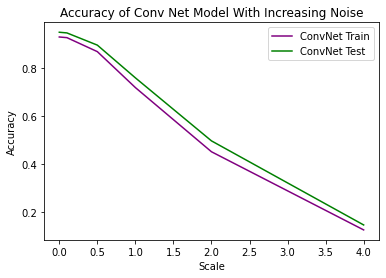

In [7]:
plt.figure()
plt.plot(scales, train_acc, label = 'ConvNet Train', c = "purple")
plt.plot(scales, test_acc, label = 'ConvNet Test', c = "green")
plt.xlabel('Scale')
plt.ylabel('Accuracy')
plt.title('Accuracy of Conv Net Model With Increasing Noise')
plt.legend()
plt.show()

In [8]:
perceptron_test = [0.9826000332832336,
0.9778000712394714,
 0.9180000424385071,
 0.7573000192642212,
 0.4139000177383423,
 0.18940000236034393]
perceptron_train = [0.9956833720207214,
0.9980166554450989,
 0.9956666827201843,
 0.9816666841506958,
 0.9045000076293945,
 0.6969166994094849]

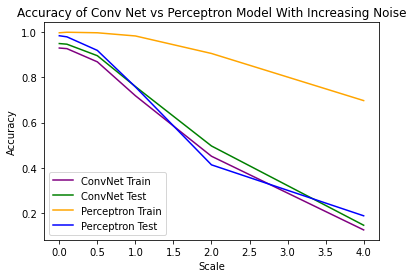

In [9]:
plt.figure()
plt.plot(scales, train_acc, label = 'ConvNet Train', c = "purple")
plt.plot(scales, test_acc, label = 'ConvNet Test', c = "green")
plt.plot(scales, perceptron_train, label = 'Perceptron Train', c = "orange")
plt.plot(scales, perceptron_test, label = 'Perceptron Test', c = "blue")
plt.xlabel('Scale')
plt.ylabel('Accuracy')
plt.title('Accuracy of Conv Net vs Perceptron Model With Increasing Noise')
plt.legend()
plt.show()

The Perceptron training model remained the best performing model across all scales. Initially, at scales below 1.0, the Perceptron test model outperformed Conv Net. However, with scales greater than about 1.5, the Conv Net models outperformed hte Perceptron test model, but still did not outperform the Perceptron training model. 